# Covid Sentimental Analysis

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
df = pd.read_csv("Sentimentdata.csv")

In [4]:
df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


## Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3090 non-null   int64 
 1   sentiment   3090 non-null   object
 2   text        3090 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.5+ KB


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.head()

,sentiment,text
0,sad,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...


In [8]:
df.duplicated().sum()

42

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3048 entries, 0 to 3089
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  3048 non-null   object
 1   text       3048 non-null   object
dtypes: object(2)
memory usage: 71.4+ KB


## Dependent Label Encoding

In [12]:
df['sentiment'].unique()

array(['sad', 'joy', 'fear', 'anger'], dtype=object)

In [13]:
df['sentiment'].value_counts()

fear     796
sad      770
anger    766
joy      716
Name: sentiment, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [15]:
df.head()
# 0 --> Anger
# 1 --> Fear
# 2--> Joy
# 3 --> Sad

,sentiment,text
0,3,agree the poor in india are treated badly thei...
1,2,if only i could have spent the with this cutie...
2,2,will nature conservation remain a priority in ...
3,3,coronavirus disappearing in italy show this to...
4,3,uk records lowest daily virus death toll since...


In [16]:
df['sentiment'].unique()

array([3, 2, 1, 0])

In [17]:
df['sentiment'].value_counts()

1    796
3    770
0    766
2    716
Name: sentiment, dtype: int64

In [18]:
df.shape

(3048, 2)

## Data Preprocessing

In [19]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
ps = PorterStemmer()
wnl = WordNetLemmatizer()

class transformation():
    def __init__(self):
        self.text = ""
        
    def text_transformation(self, text):
        y = []
        text = text.split()           # Tokenization

        for i in text:
            y.append(ps.stem(i))          # Stemming

        text = y[:]
        y.clear()

        for i in text:
            y.append(wnl.lemmatize(i))           # Lemmitization

        text = y[:]
        y.clear()

        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)           # StopWord and Punctation Removal

        z = " ".join(y)
        z = re.sub(r'http\S+', ' ', z)      # Removing all the link releted text
        z = re.sub('[^a-zA-Z]', ' ',  z)    # Removing all the element except a-z and A-Z
        
        return z

In [20]:
tf = transformation()

In [21]:
df['transformed_text'] = df['text'].apply(tf.text_transformation)

In [22]:
df.head()

,sentiment,text,transformed_text
0,3,agree the poor in india are treated badly thei...,agre poor india treat badli poor seek live sin...
1,2,if only i could have spent the with this cutie...,onli could spent thi cuti vc sakshi n g h co...
2,2,will nature conservation remain a priority in ...,natur conserv remain prioriti post corona bang...
3,3,coronavirus disappearing in italy show this to...,coronaviru disappear itali show thi intellect...
4,3,uk records lowest daily virus death toll since...,uk record lowest daili viru death toll sinc st...


## Encoding of Independent & Dependent Data

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
X = vector.fit_transform(df['transformed_text'])
y = df['sentiment']

In [24]:
print(X)

  (0, 3135)	0.12752316174279663
  (0, 2502)	0.21291797224041042
  (0, 1045)	0.11270030274174049
  (0, 1506)	0.07671571233980831
  (0, 2446)	0.17566802287476904
  (0, 2356)	0.12338110852575408
  (0, 6816)	0.13898378195358804
  (0, 3103)	0.11123619656069994
  (0, 986)	0.12007446431461066
  (0, 1020)	0.1833980857912587
  (0, 6267)	0.22381288400674143
  (0, 1619)	0.15016607783488287
  (0, 2513)	0.1395616570990087
  (0, 7056)	0.1663089667543042
  (0, 4249)	0.1476839920714835
  (0, 2571)	0.14931298527545867
  (0, 2717)	0.31876211538534466
  (0, 1207)	0.14848614592634135
  (0, 3949)	0.10798102776493823
  (0, 6281)	0.19015094434054716
  (0, 3976)	0.12035880727076735
  (0, 6077)	0.19015094434054716
  (0, 518)	0.19429299755758972
  (0, 7055)	0.4858261720239405
  (0, 3331)	0.11103340194820294
  :	:
  (3046, 1661)	0.16568134445217728
  (3046, 6898)	0.18624411133321964
  (3046, 7740)	0.12693225441889808
  (3046, 896)	0.18624411133321964
  (3046, 4441)	0.15673569146994432
  (3046, 7450)	0.2053373395

In [25]:
print(y)

0       3
1       2
2       2
3       3
4       3
       ..
3084    0
3086    0
3087    2
3088    3
3089    3
Name: sentiment, Length: 3048, dtype: int32


## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=78, shuffle=True)

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2286, 7811), (2286,), (762, 7811), (762,))

## Logistic Regression

In [28]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, plot_confusion_matrix

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=56)
lr.fit(X_train,y_train)
y_predLR = lr.predict(X_test)

acc_lrTrain = lr.score(X_train,y_train) * 100
acc_lrTest = accuracy_score(y_predLR, y_test) * 100
print("Training Accuracy: ", acc_lrTrain)
print("Validation Accuracy: ", acc_lrTest)

Training Accuracy:  95.18810148731409
Validation Accuracy:  73.88451443569554


In [30]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       179
           1       0.69      0.63      0.66       199
           2       0.83      0.75      0.79       181
           3       0.76      0.85      0.80       203

    accuracy                           0.74       762
   macro avg       0.74      0.74      0.74       762
weighted avg       0.74      0.74      0.74       762



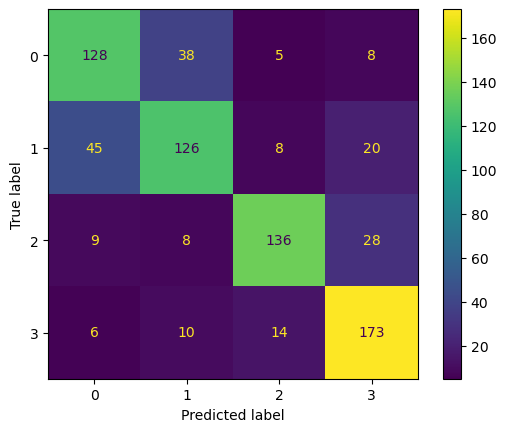

In [31]:
conf_matrix_LR = plot_confusion_matrix(lr, X_test, y_test)